This model predicts the income level of a person given several characteristicts of that person. I will be using simple decision trees, random forests and logistic regression to compare the accuracy of all the models and choose the best one for inferential purposes.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing necessary functions from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
#defining column names and importing the dataset. here income column is target variable and all the other columns are predictor variables.
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.csv', header=None, names = col_names)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df.occupation[2]

' Handlers-cleaners'

In [6]:
#we have a small proble. all string  values have a space before them i.e. workclass has values .." State-gov", " Private"
# so need to take the space out.
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())
df.occupation[2]


'Handlers-cleaners'

In [7]:
print(df['native-country'].unique())
print(df['race'].unique())
print(df['workclass'].unique())
print(df['education'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [86]:
feature_cols = ['age', 'workclass','education', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country']
X = df[feature_cols]

# Converting categorical features to dummy variables
X = pd.get_dummies(X, drop_first=False)

X

,age,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,0,0,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
y = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I will be crating a simple decision tree first with max depth of 3 for simplification.

In [88]:
tree_classifier = DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8186703516044833


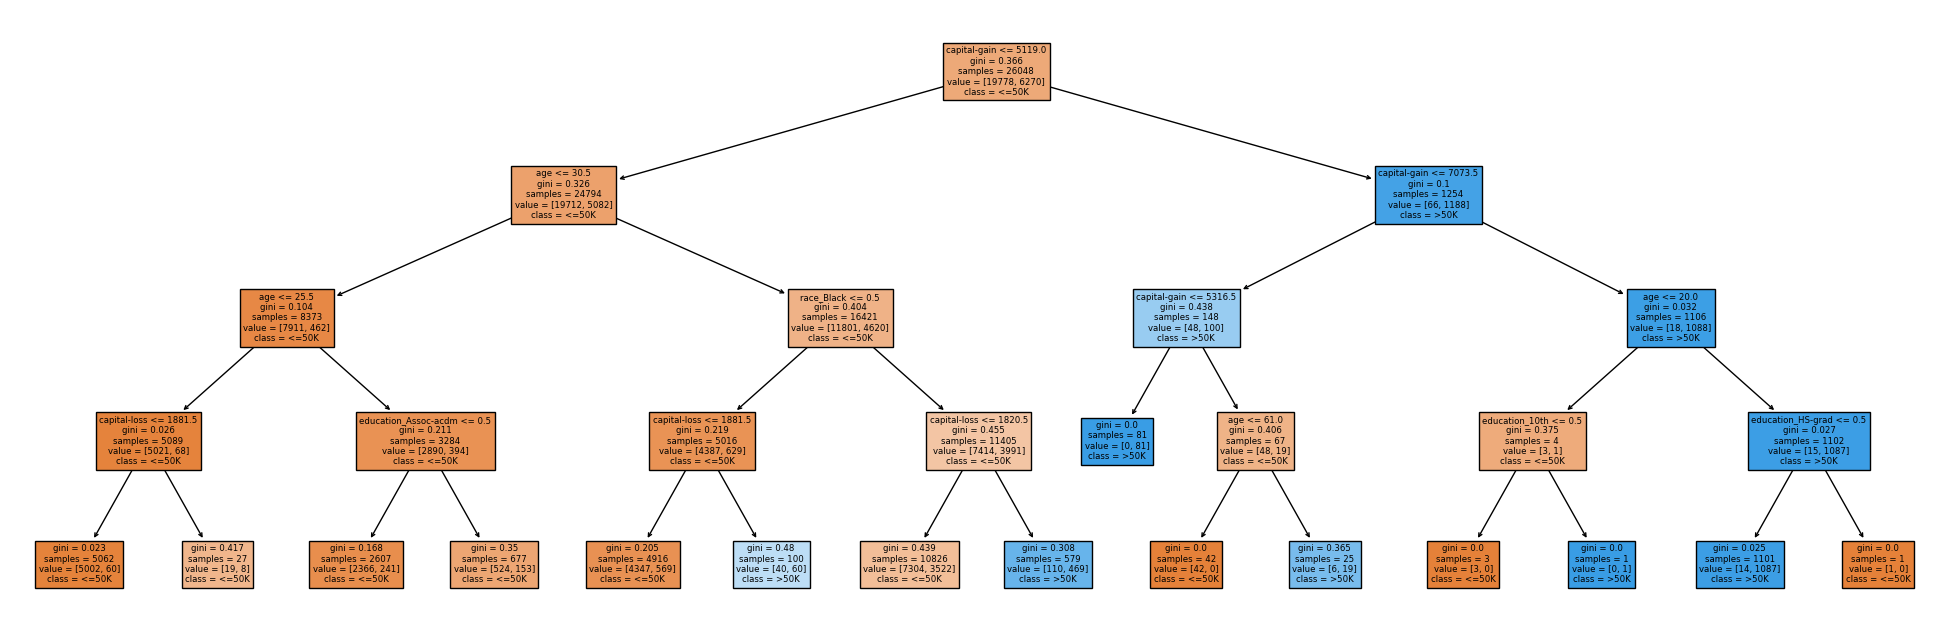

In [89]:
#visualizing the above decision tree.
fig, ax = plt.subplots(figsize=(25, 8))
tree.plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], ax=ax)
plt.show()

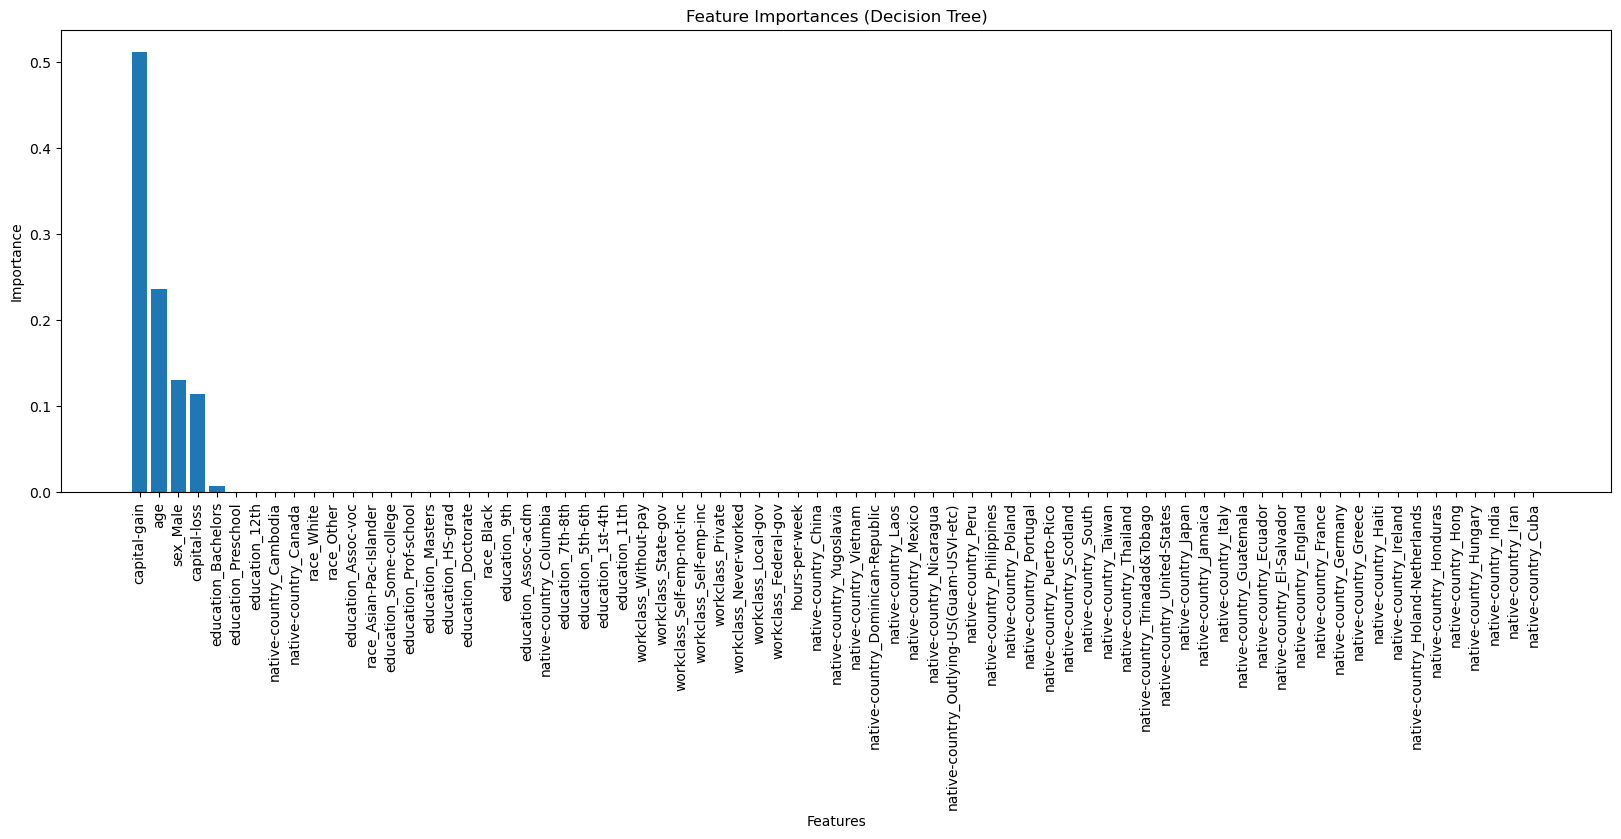

In [90]:
#Visualization of important features in the decision tree above.
importances = tree_classifier.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the names of the features
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Decision Tree)")
plt.show()

Now I will be performing logistic regression and see the accuracy of that model.

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



/Users/dahalsulav23/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8174420389989252
Precision: 0.70276008492569
Recall: 0.4213876511775939
F1-score: 0.5268603263032232


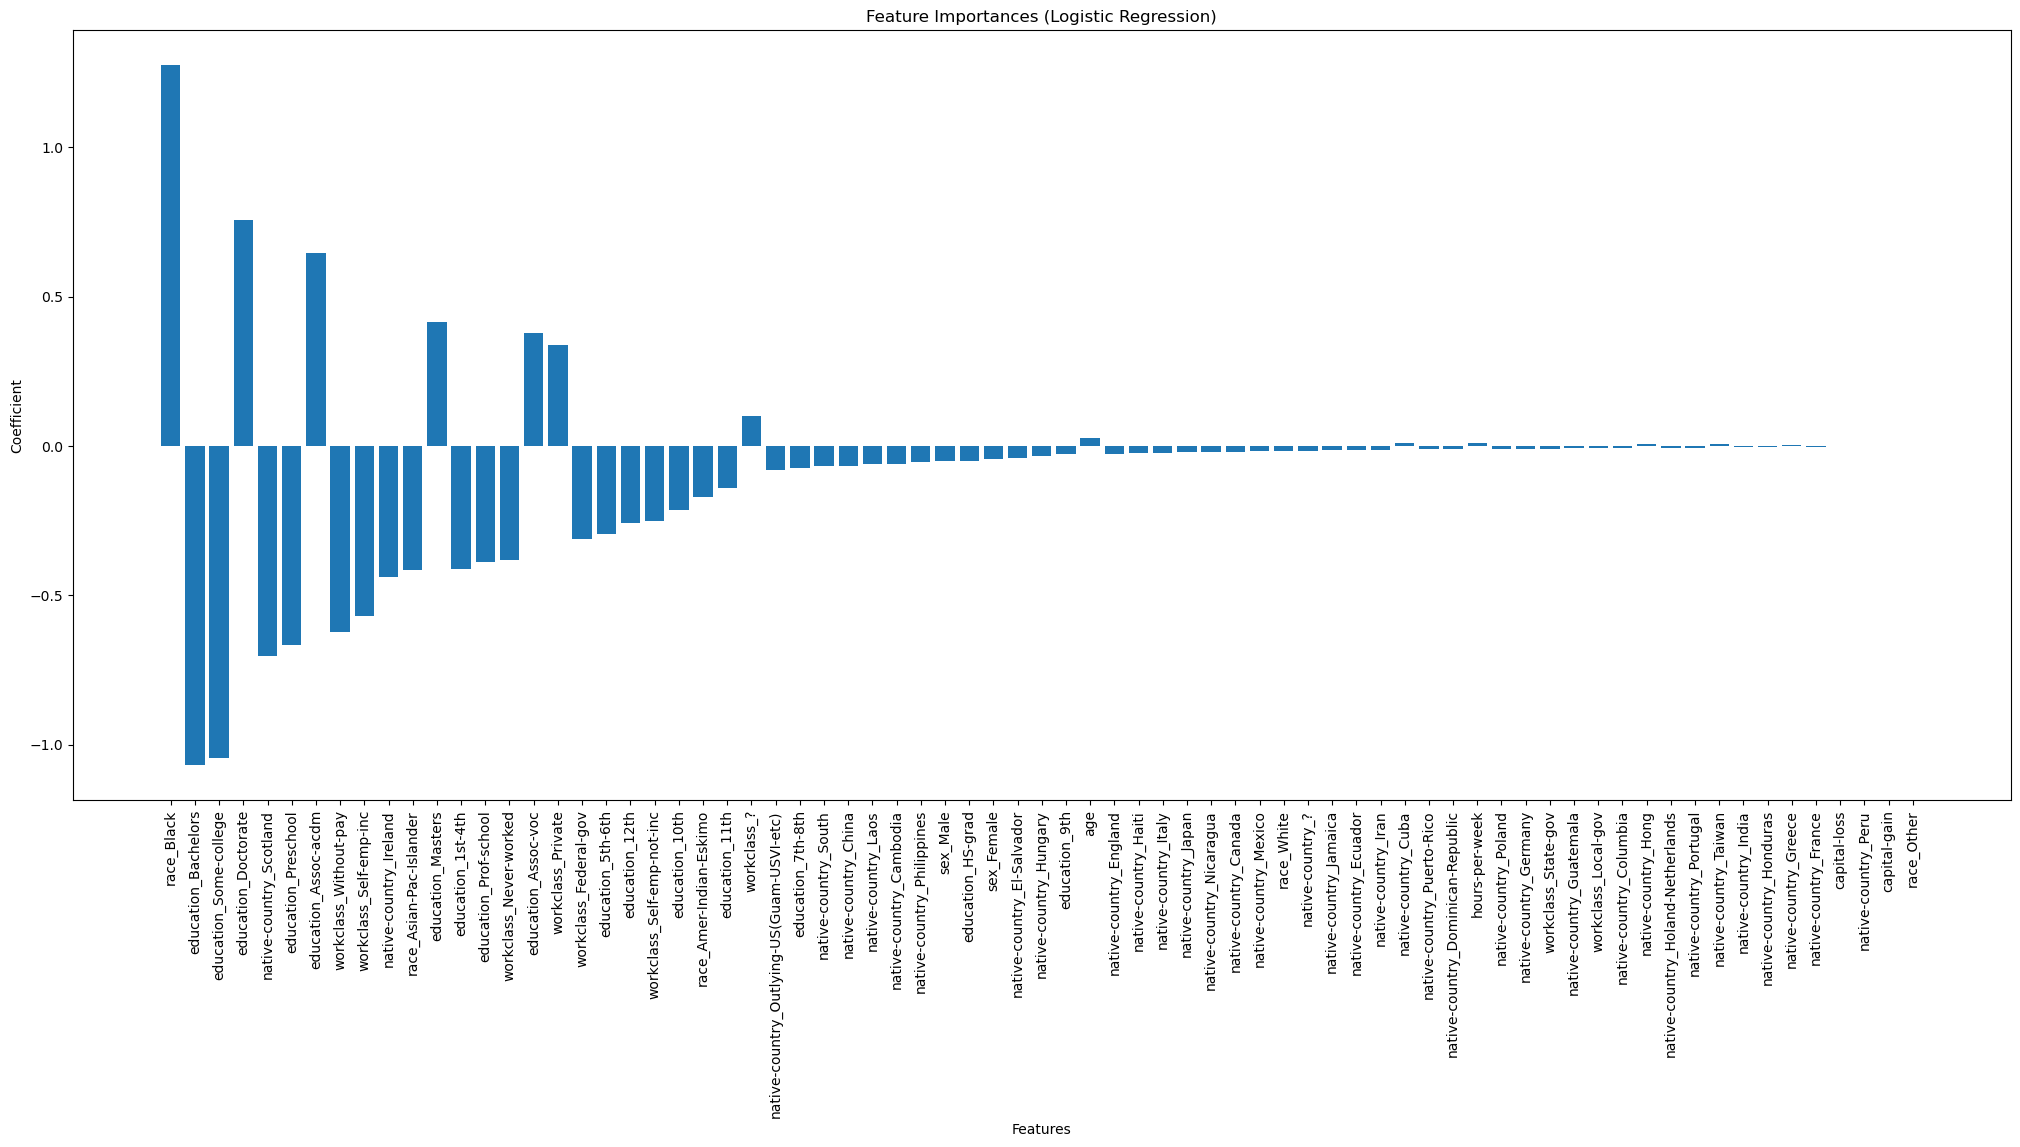

In [93]:
coefficients = logreg.coef_[0]

# Sorting the coefficients in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Extracting the names of the features
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(25, 10))
plt.bar(range(len(coefficients)), coefficients[sorted_indices])
plt.xticks(range(len(coefficients)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importances (Logistic Regression)")
plt.show()

Now I will perform regular random forest method.

In [94]:
rf = RandomForestClassifier()

# Fit the model on the train data
rf.fit(X_train, y_train)

# Print the accuracy score on the test data
accuracy = rf.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8235836020267158


In [95]:
# Evaluating random forest performances with varying max depths.
max_depth_values = range(1, 26)

# Initializing lists to store accuracy scores
accuracy_train = []
accuracy_test = []
depth = []
# Iterating over max_depth values
for max_depth in max_depth_values:
    # Instantiating a RandomForestClassifier with the current max_depth
    rf = RandomForestClassifier(max_depth=max_depth)

    # Fitting the model on the train data
    rf.fit(X_train, y_train)

    # Predicting on train and test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculating accuracy scores and append to lists
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    depth.append(max_depth)

In [96]:
accuracy_data = {"depth":depth, "accuracy_train":accuracy_train, "accuracy_test":accuracy_test}
accuracy = pd.DataFrame(accuracy_data)
accuracy

,depth,accuracy_train,accuracy_test
0,1,0.759291,0.758790
1,2,0.772881,0.773223
2,3,0.780981,0.782128
3,4,0.804438,0.806080
4,5,0.806050,0.807155
5,6,0.817529,0.818210
6,7,0.820025,0.819131
7,8,0.827549,0.826040
8,9,0.831503,0.828343
9,10,0.841024,0.834945


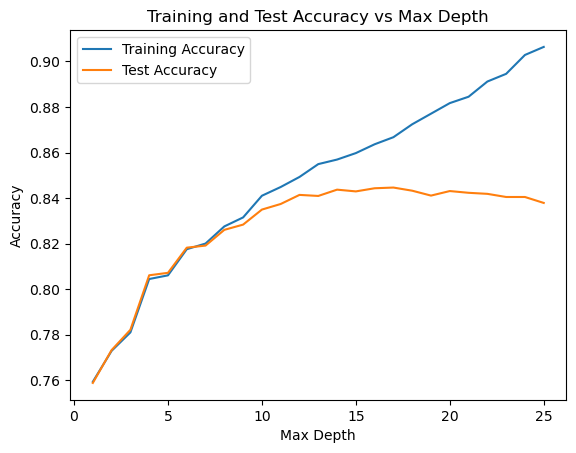

In [97]:
# Plotting training vs test accuracies in max depths.
plt.plot(accuracy.depth, accuracy.accuracy_train, label='Training Accuracy')
plt.plot(accuracy.depth, accuracy.accuracy_test, label='Test Accuracy')

# Set the labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Max Depth')

# Set the legend
plt.legend()

# Show the plot
plt.show()

Since we found out from the graph above that test accuracy doesn't much improve after max depth of 10, we will be specifying max depth of 10 in our random forest model below.

In [98]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create and train a Random Forest classifier with max_depth=10
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Get feature importances and create a dataframe
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top five features
top_features = feature_importances.head(5)
print("Top five features:\n", top_features)

Top five features:
            Feature  Importance
1     capital-gain    0.277012
0              age    0.178191
3   hours-per-week    0.122560
31        sex_Male    0.080103
2     capital-loss    0.075938


we know what top 5 features that determine if a person makes more than 50k or not from above top 5 features. but it doesn't give full picture as they are only positives. I will visualize the feature importances of both positives and negatives below.

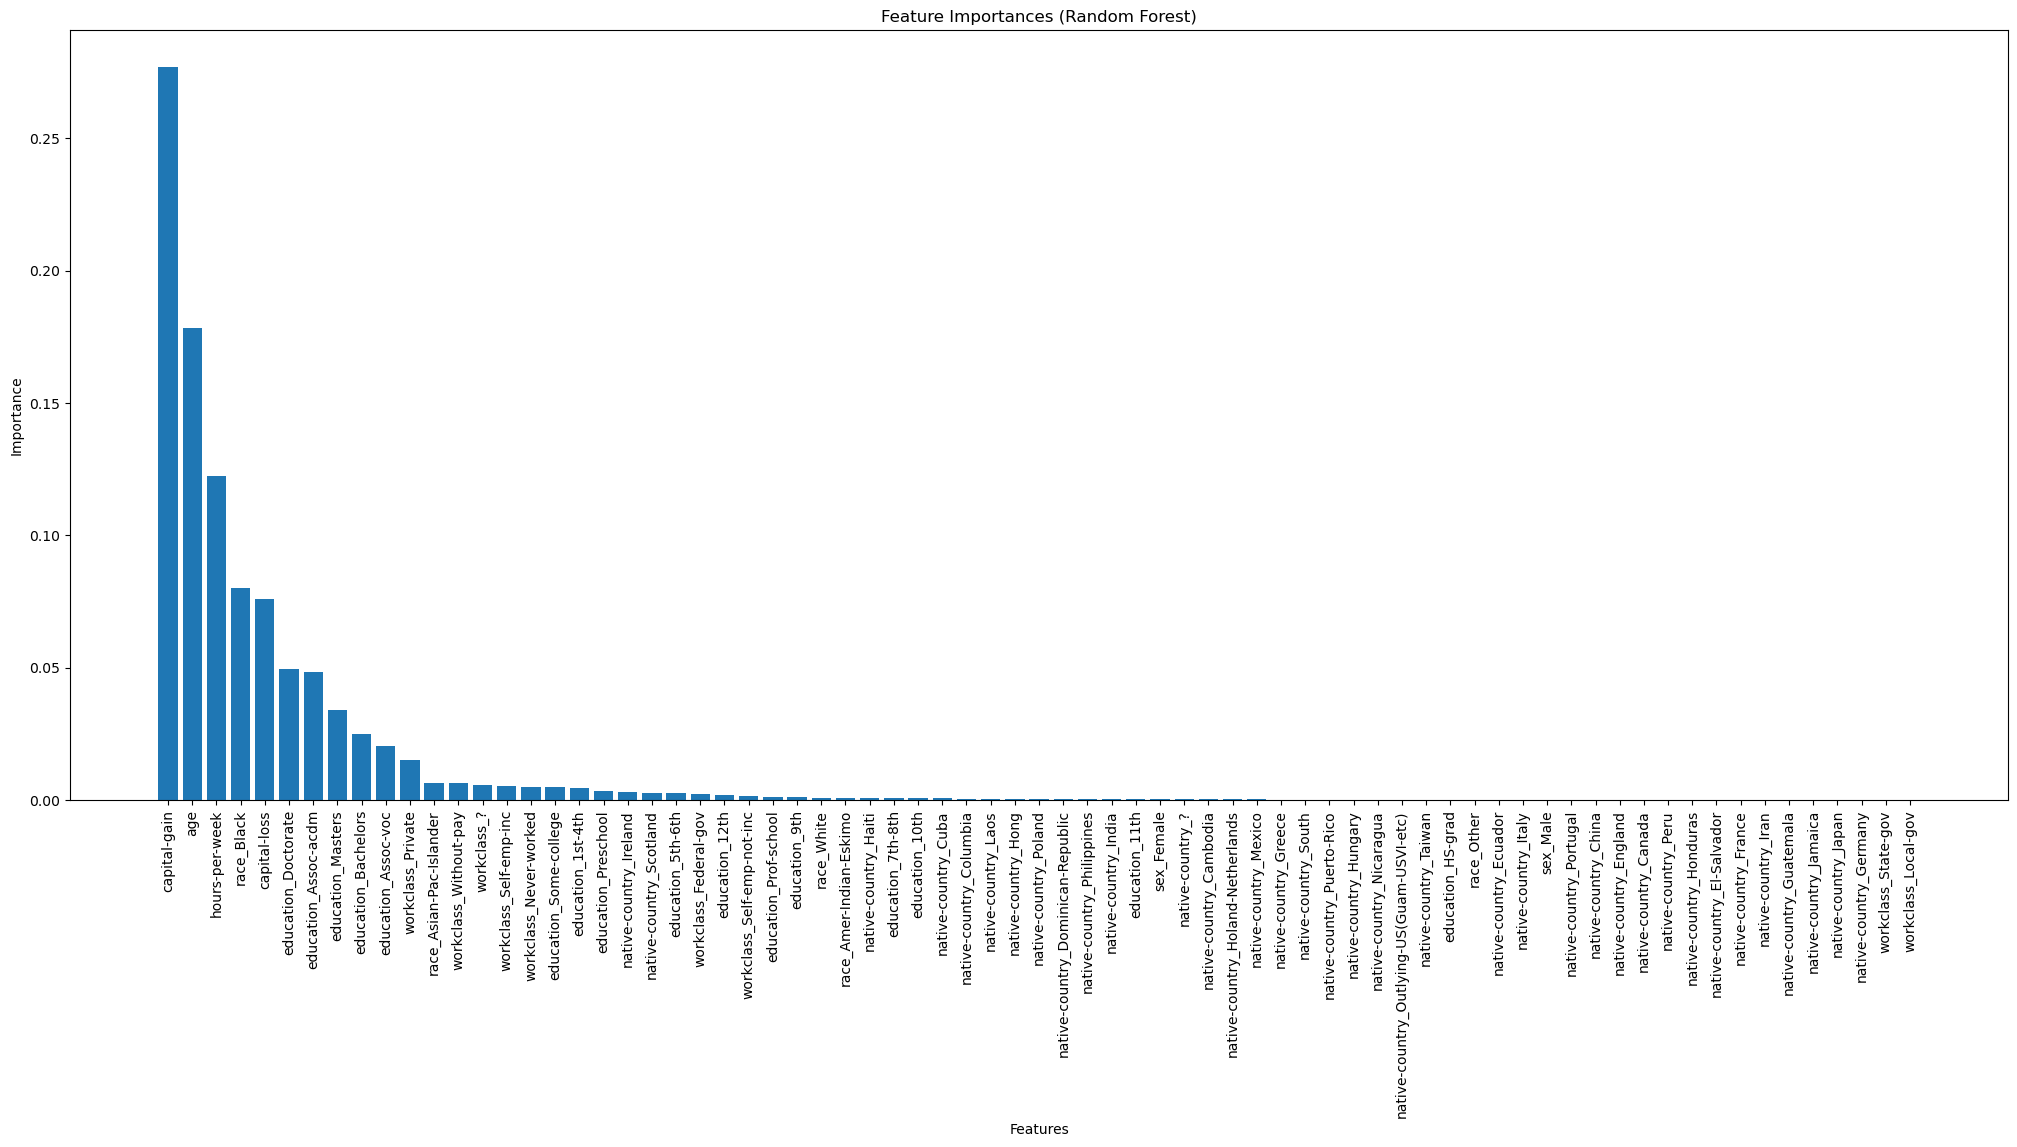

In [99]:
# Get feature importances from the random forest model
importances = rf.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(25, 10))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()

Note: The feature importances obtained from a random forest model are typically positive values because they represent the relative importance of each feature in predicting the target variable. The values indicate the extent to which each feature contributes to the overall predictive power of the model.

The feature importances are calculated based on the decrease in impurity (e.g., Gini impurity) achieved by each feature when making splits in the decision trees of the random forest. Higher importances indicate that the feature has a stronger predictive relationship with the target variable.

In the context of logistic regression, the coefficients represent the estimated effect of each feature on the log-odds of the target variable. These coefficients can take positive or negative values, indicating the direction and strength of the relationship between the feature and the target.

Therefore, when comparing the feature importances from a random forest model and the coefficients from a logistic regression model, it's important to note that they have different interpretations and scales. The positive values of feature importances in the random forest model reflect the importance of each feature, while the positive or negative values of coefficients in the logistic regression model represent the direction and magnitude of the feature's effect on the target variable.

#Part 2: we can see there are too many features above. we will simplify them by binning the related features together.

In [100]:
# I am going to reduce education lavel categories to High School and Less, College to Bachelors and Masters and More.
# Mapping dictionary for education grouping
education_mapping = {
    'Preschool': 'High School and Less',
    '1st-4th': 'High School and Less',
    '5th-6th': 'High School and Less',
    '7th-8th': 'High School and Less',
    '9th': 'High School and Less',
    '10th': 'High School and Less',
    '11th': 'High School and Less',
    '12th': 'High School and Less',
    'HS-grad': 'High School and Less',
    'Some-college': 'College to Bachelors',
    'Assoc-voc': 'College to Bachelors',
    'Assoc-acdm': 'College to Bachelors',
    'Bachelors': 'College to Bachelors',
    'Masters': 'Masters and More',
    'Prof-school': 'Masters and More',
    'Doctorate': 'Masters and More'
}

# Create the new education_bin column by mapping the values
df['education_bin'] = df['education'].map(education_mapping)


In [101]:
# similarly I am going to reduce countries into continents.
# Mapping dictionary for country to continent
continent_mapping = {
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    '?': 'Unknown',
    'Mexico': 'North America',
    'South': 'Unknown',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'Unknown',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe'
}

# Create the new continent column by mapping the values
df['continent'] = df['native-country'].map(continent_mapping)


now we will perform all the above tests again to see if grouping some classes affects their importance.

In [78]:
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_bin,continent,work_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,College to Bachelors,North America,gov-job
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,College to Bachelors,North America,no-income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,High School and Less,North America,has-income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,High School and Less,North America,has-income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,College to Bachelors,North America,has-income
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Masters and More,North America,has-income
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,High School and Less,North America,has-income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,High School and Less,North America,no-income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Masters and More,North America,has-income
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,College to Bachelors,North America,has-income


In [102]:
df['workclass'].unique()
work_mapping = {
    'State-gov':'gov-job',
    'Federal-gov':'gov-job',
    'Local-gov' :'gov-job',
    'Self-emp-inc':'has-income',
    'Private':'has-income',
    '?':'no-idea',
    'Without-pay':'no-income',
    'Never-worked':'no-income',
    'Self-emp-not-inc':'no-income'
}
df['work_type'] = df['workclass'].map(work_mapping)
#here we reduced work type from 8 to four.

In [103]:
feature_cols = ['age', 'work_type','education_bin', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','continent']
X = df[feature_cols]

# Converting categorical features to dummy variables
X = pd.get_dummies(X, drop_first=False)

X
#we have effectively decreased 73 columns into 18.

,age,capital-gain,capital-loss,hours-per-week,work_type_gov-job,work_type_has-income,work_type_no-idea,work_type_no-income,education_bin_College to Bachelors,education_bin_High School and Less,...,race_Black,race_Other,race_White,sex_Female,sex_Male,continent_Asia,continent_Europe,continent_North America,continent_South America,continent_Unknown
0,39,2174,0,40,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,50,0,0,13,0,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
2,38,0,0,40,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,53,0,0,40,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,28,0,0,40,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
32557,40,0,0,40,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
32558,58,0,0,40,0,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
32559,22,0,0,20,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [104]:
y = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [106]:
tree_classifier = DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8034699831107017


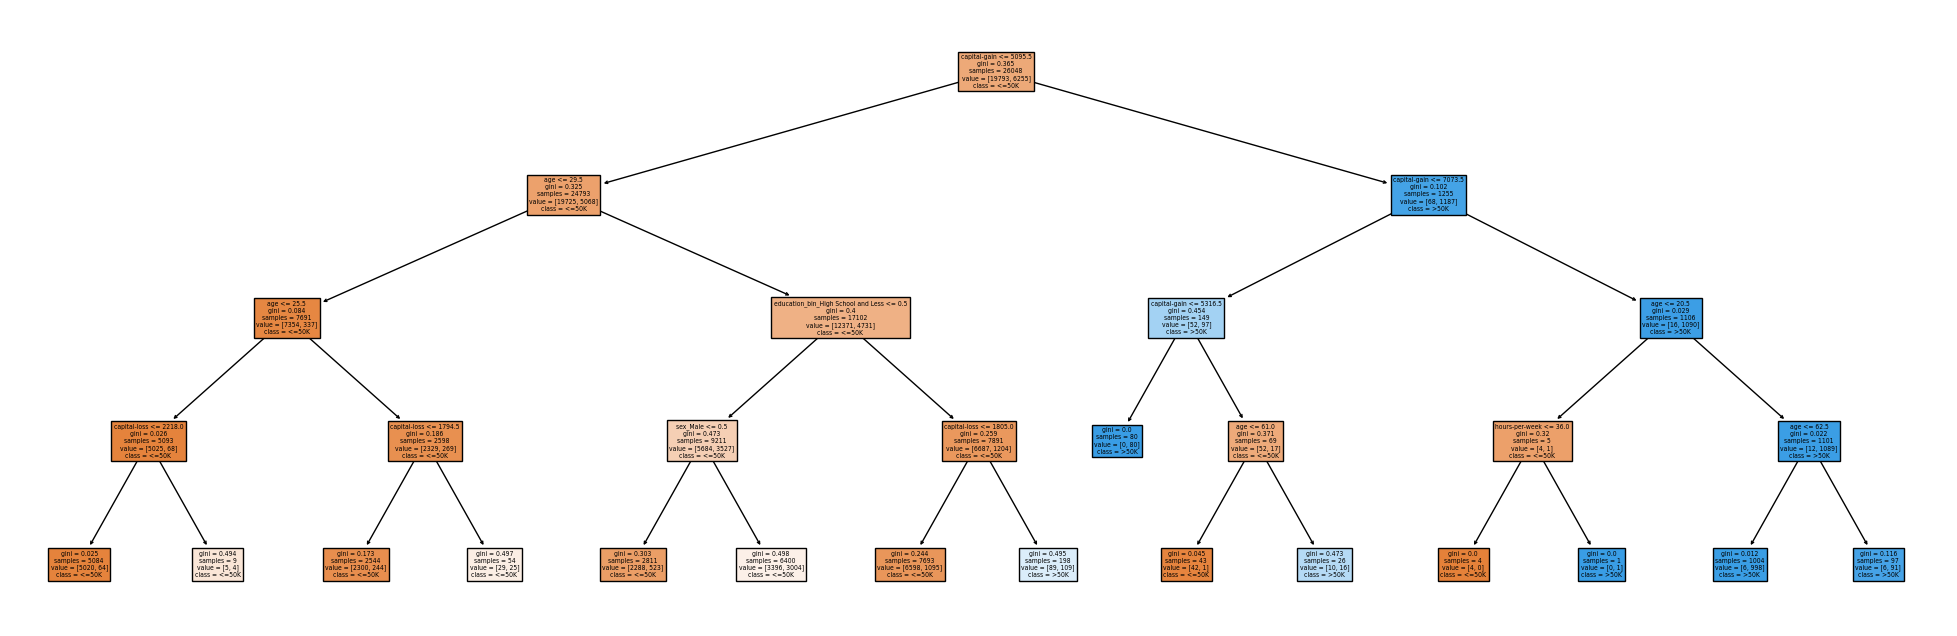

In [107]:
#visualizing the above decision tree.
fig, ax = plt.subplots(figsize=(25, 8))
tree.plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], ax=ax)
plt.show()

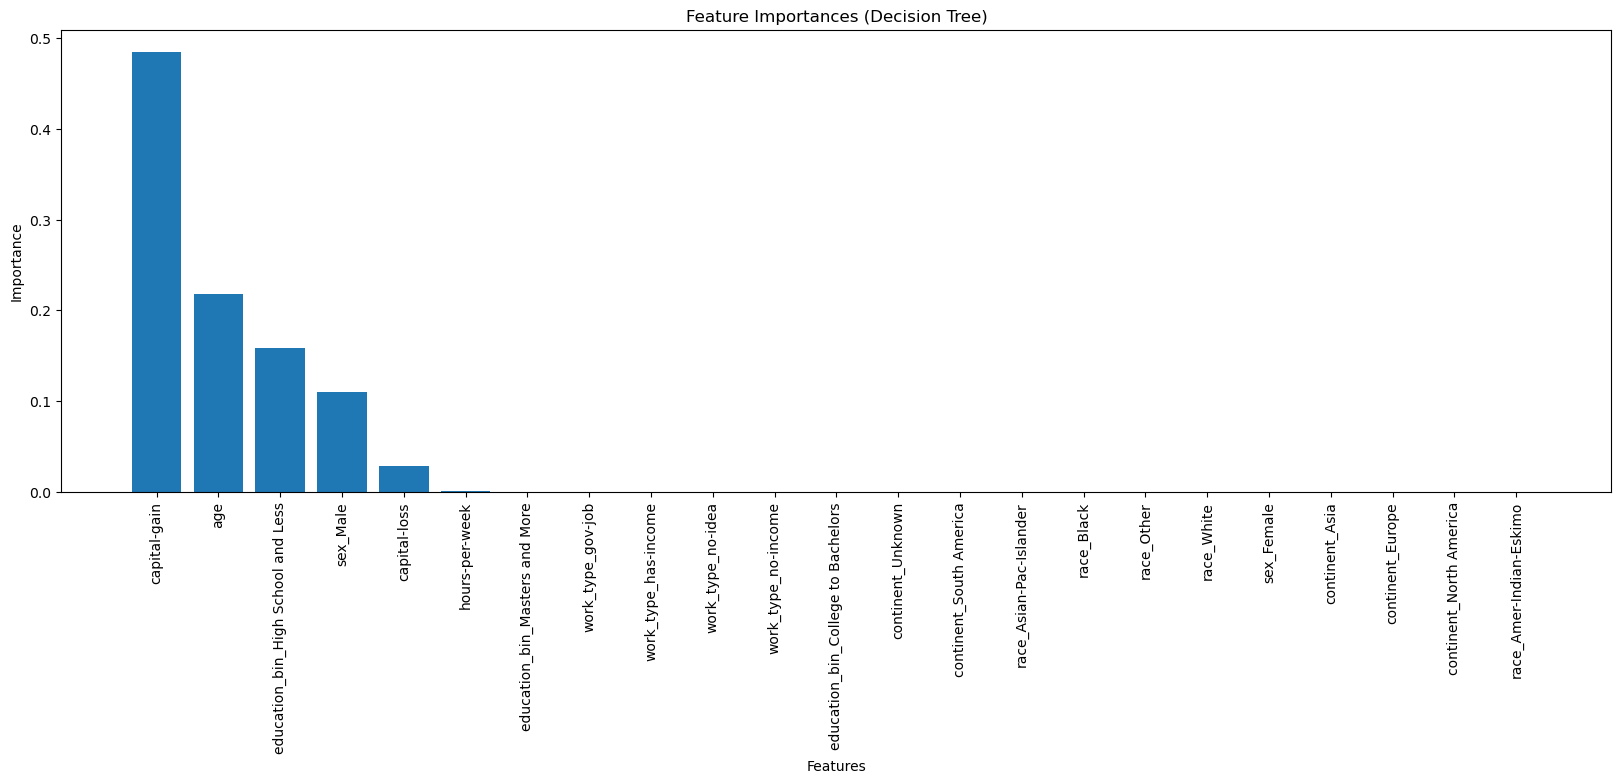

In [108]:
#Visualization of important features in the decision tree above.
importances = tree_classifier.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the names of the features
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Decision Tree)")
plt.show()

In [123]:
# similarly for logistic regression.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/dahalsulav23/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.822201750345463
Precision: 0.7257383966244726
Recall: 0.4337957124842371
F1-score: 0.5430149960536701


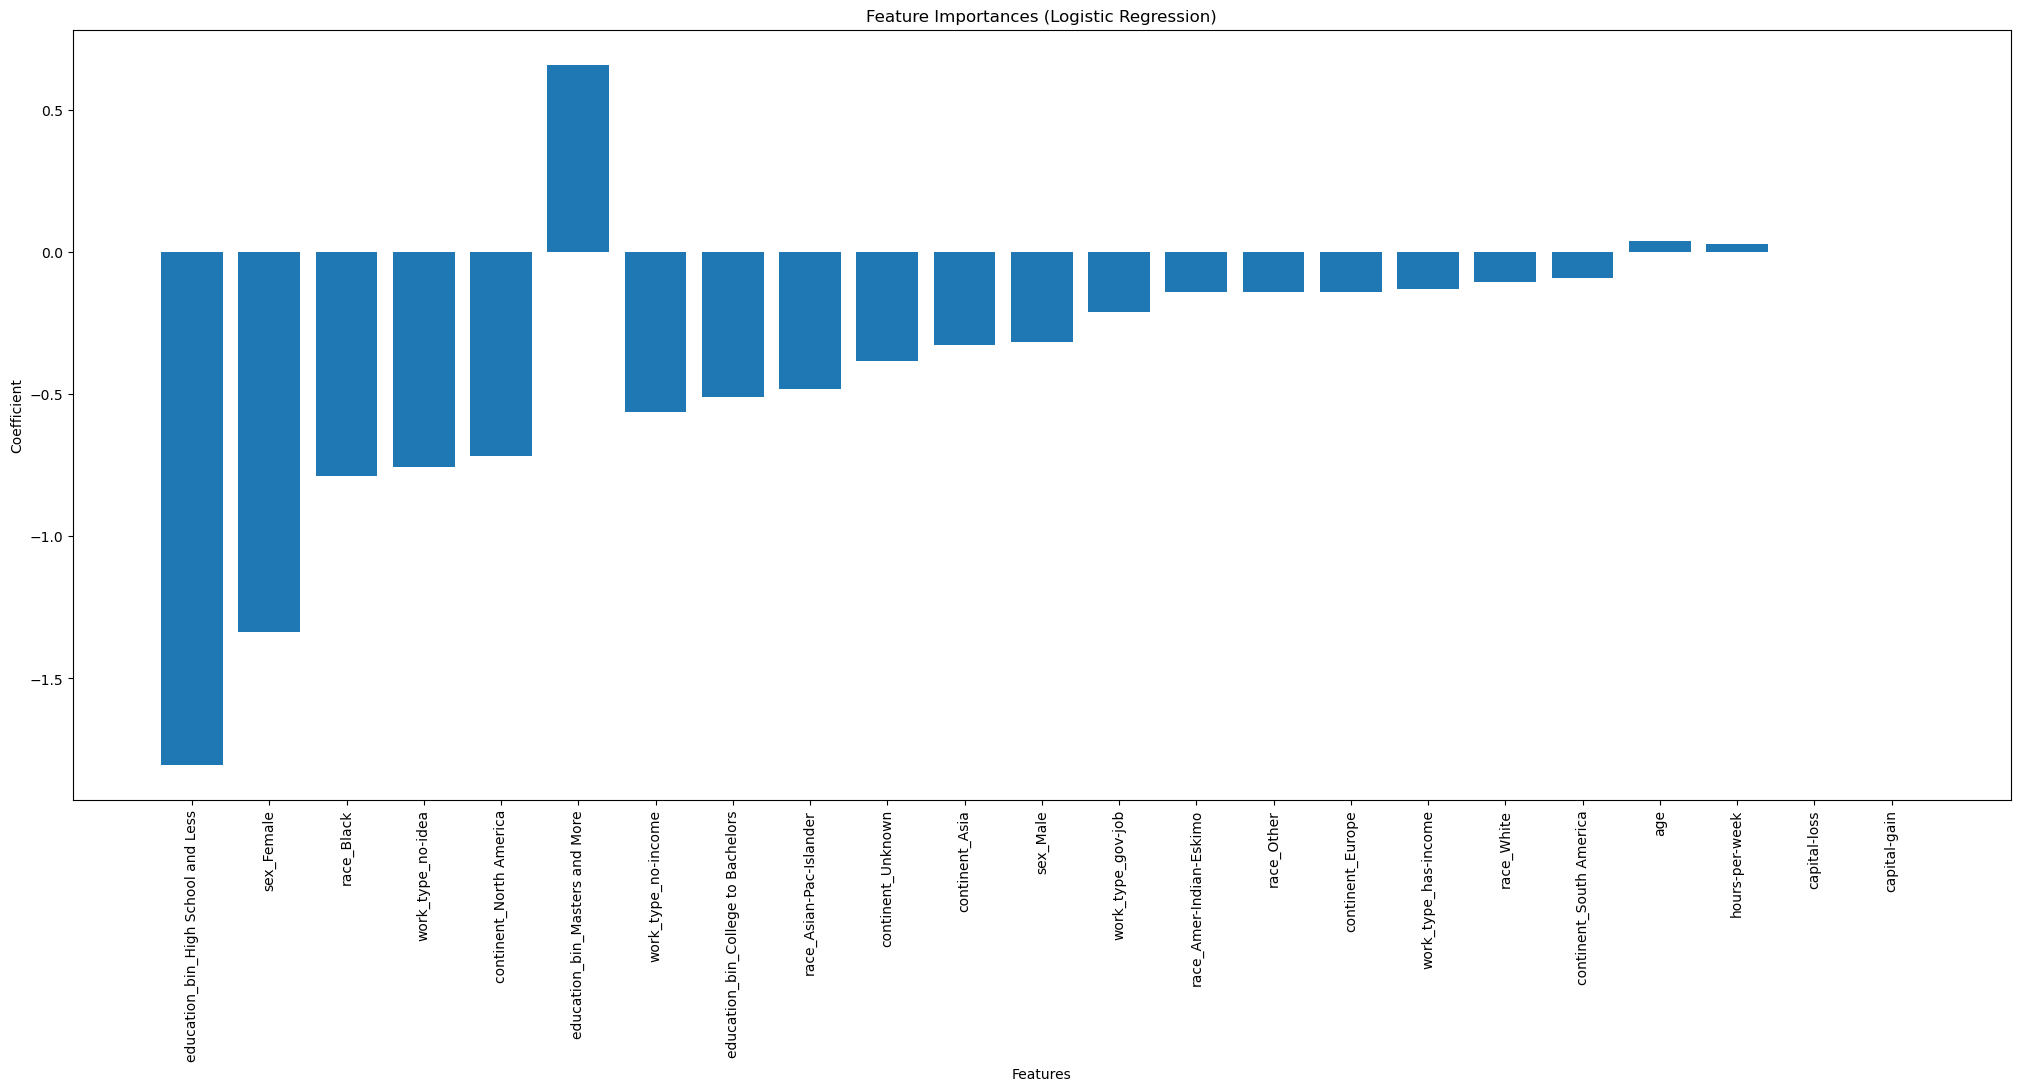

In [125]:
coefficients = logreg.coef_[0]

# Sorting the coefficients in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Extracting the names of the features
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(25, 10))
plt.bar(range(len(coefficients)), coefficients[sorted_indices])
plt.xticks(range(len(coefficients)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importances (Logistic Regression)")
plt.show()
# there seems to be a problem of multicollinearity in this model.

In [112]:
# now random forest:
# Evaluating random forest performances with varying max depths.
max_depth_values = range(1, 26)

# Initializing lists to store accuracy scores
accuracy_train = []
accuracy_test = []
depth = []
# Iterating over max_depth values
for max_depth in max_depth_values:
    # Instantiating a RandomForestClassifier with the current max_depth
    rf = RandomForestClassifier(max_depth=max_depth)

    # Fitting the model on the train data
    rf.fit(X_train, y_train)

    # Predicting on train and test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculating accuracy scores and append to lists
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    depth.append(max_depth)


In [113]:
accuracy_data = {"depth":depth, "accuracy_train":accuracy_train, "accuracy_test":accuracy_test}
accuracy = pd.DataFrame(accuracy_data)
accuracy

,depth,accuracy_train,accuracy_test
0,1,0.759866,0.756487
1,2,0.770846,0.769077
2,3,0.807049,0.806234
3,4,0.820984,0.824198
4,5,0.828662,0.831721
5,6,0.830928,0.834024
6,7,0.833615,0.836634
7,8,0.836648,0.838170
8,9,0.838529,0.837709
9,10,0.847474,0.842162


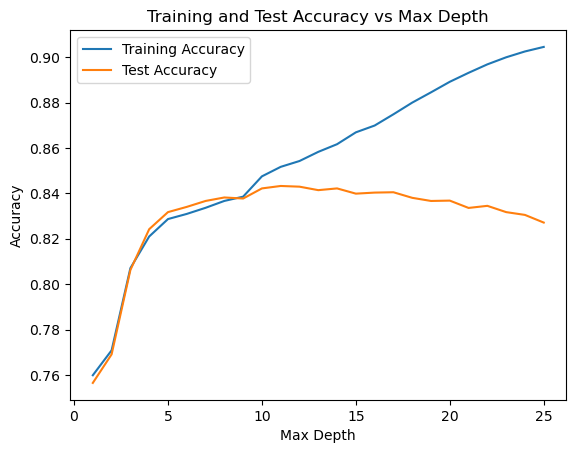

In [114]:
# Plotting training vs test accuracies in max depths.
plt.plot(accuracy.depth, accuracy.accuracy_train, label='Training Accuracy')
plt.plot(accuracy.depth, accuracy.accuracy_test, label='Test Accuracy')

# Set the labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Max Depth')

# Set the legend
plt.legend()

# Show the plot
plt.show()
# here the test accuracy starts decreasing after 11 as max depth. so we will have 11 as our max depth.

In [115]:
# Create and train a Random Forest classifier with max_depth=10
rf = RandomForestClassifier(n_estimators=100, max_depth=11)
rf.fit(X_train, y_train)

# Get feature importances and create a dataframe
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top five features
top_features = feature_importances.head(5)
print("Top five features:\n", top_features)

Top five features:
                                Feature  Importance
1                         capital-gain    0.283980
0                                  age    0.197135
3                       hours-per-week    0.099734
10      education_bin_Masters and More    0.088617
9   education_bin_High School and Less    0.079098


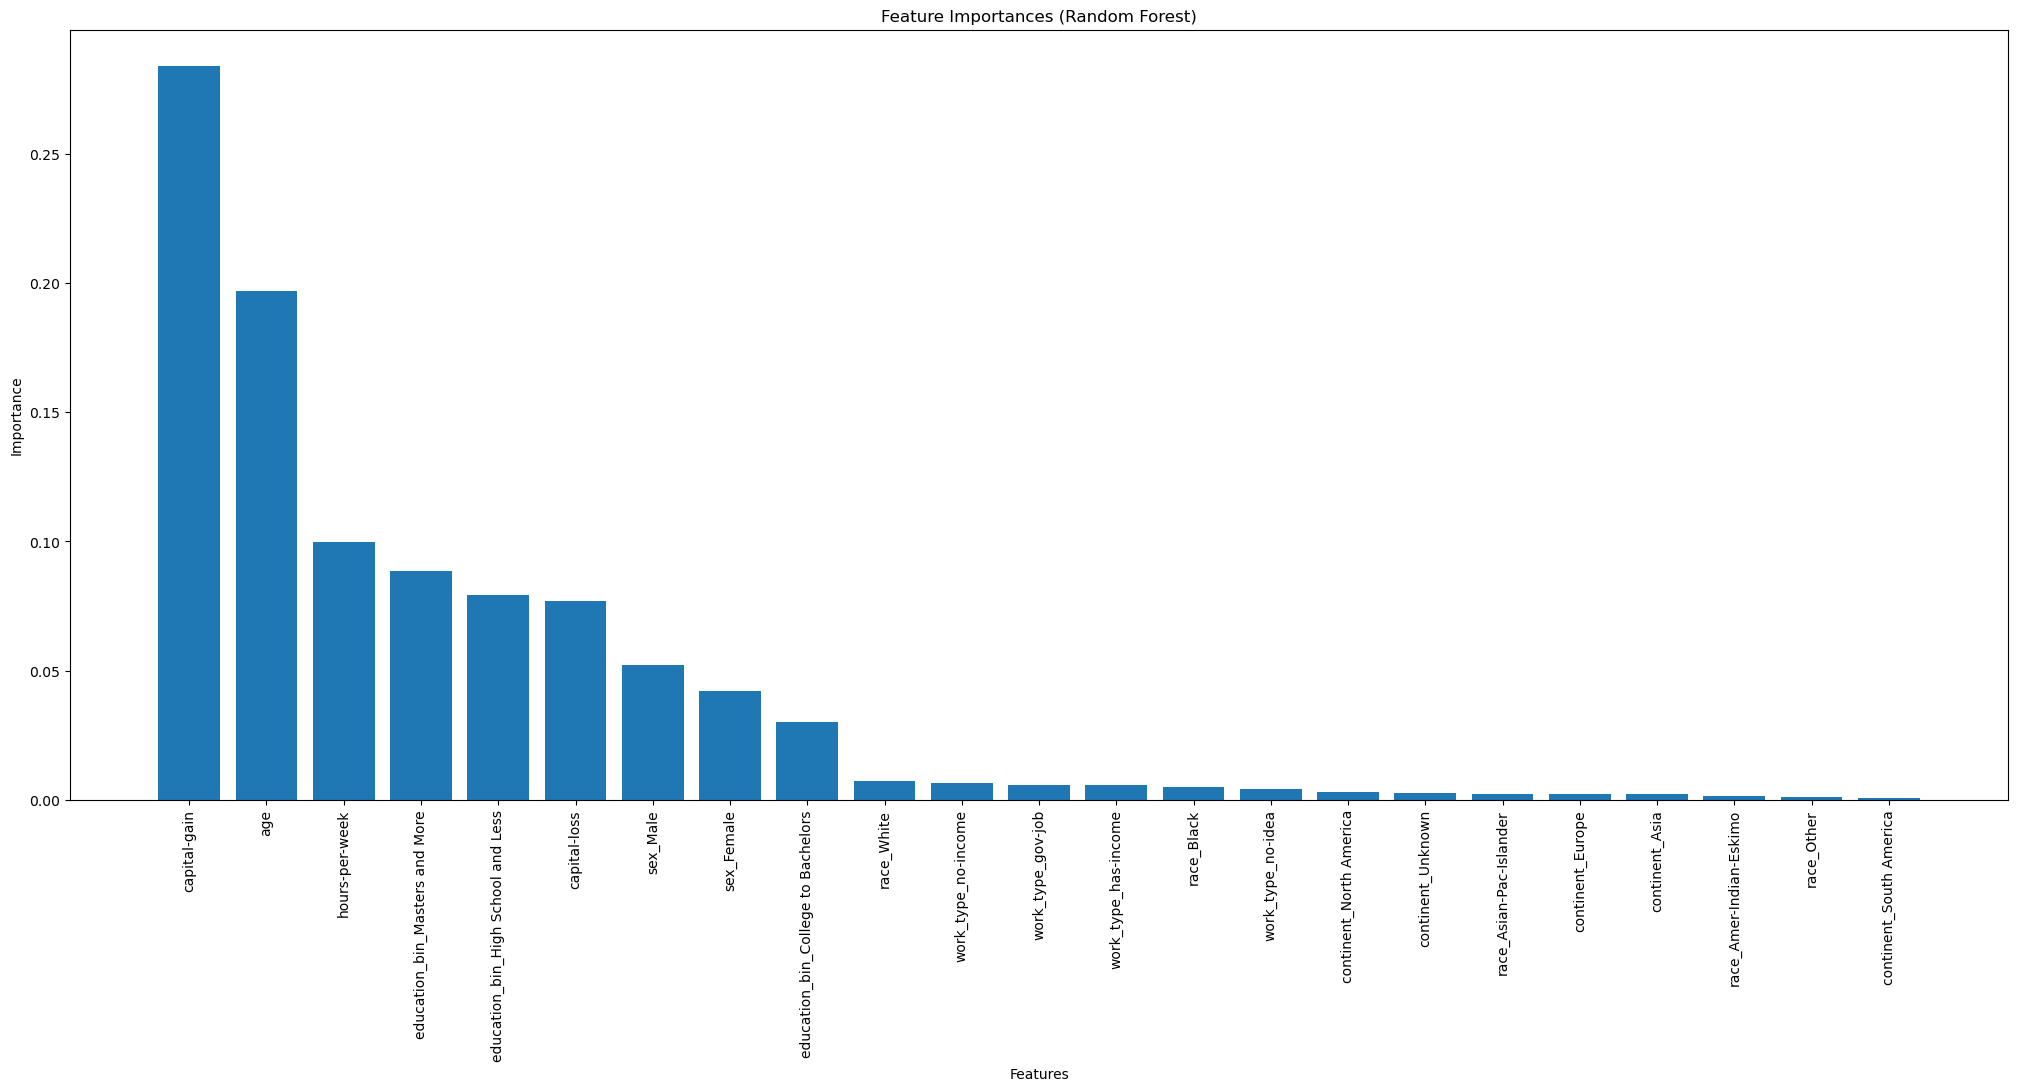

In [116]:
# Get feature importances from the random forest model
importances = rf.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(25, 10))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()